In [1]:

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import pydot
import seaborn as sns

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier



In [2]:
# loading the handwritten numbers data

(X_train_digit,y_train_digit),(X_test_digit,y_test_digit) = mnist.load_data()

In [3]:
X_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [4]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

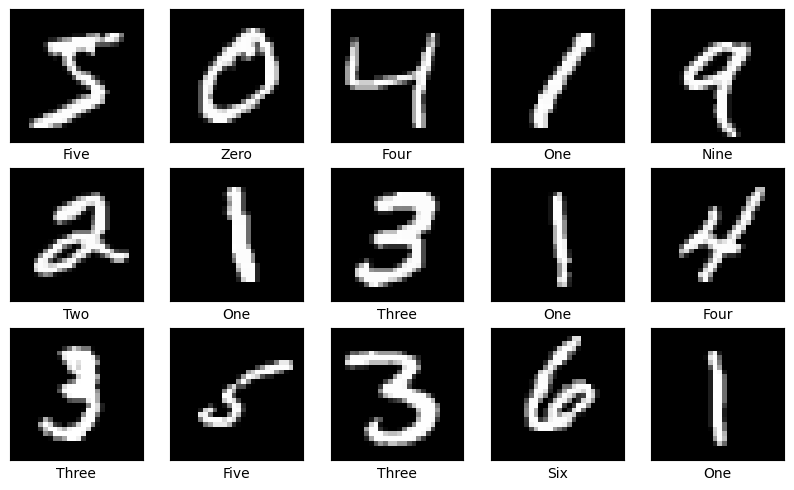

In [5]:
#Names of numbers in the dataset

col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualization of some images

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

# ANN takes input only in 2 Dimensional

but the data that we have is 3 dimensional, we need to reshape it.

In [7]:
X_train_digit.shape

(60000, 28, 28)

In [8]:
X_train_digit = X_train_digit.reshape(60000,784)
X_test_digit  = X_test_digit.reshape(10000,784)

In [9]:
X_train_digit.shape

(60000, 784)

In [10]:
X_train_digit

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

# out put Preprocessing

The output for the ANN Model is preprocessed by using one hot encoding

In [13]:
y_train_digit.shape

(60000,)

In [14]:
y_test_digit.shape

(10000,)

In [15]:
y_train_digit = to_categorical(y_train_digit, num_classes = 10)
y_test_digit = to_categorical(y_test_digit, num_classes = 10)

# the 10 represents the "10" numbers from 0 to 9.. if the detected number is 4, the corresponding column of the particular image will be made as 1.

In [16]:
y_test_digit

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Creating a base neural Network

In [18]:
model = keras.Sequential([
    layers.Dense(256,activation='relu',input_shape = (784,)), # Input layer
    layers.Dense(64,activation='relu'),# Hidden Layer 1
    layers.Dense(64,activation='relu'),# Hidden Layer 2
    layers.Dense(10,activation='sigmoid'), # Output Layer
])

C:\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary() # displays the Model architecture

#'Param # '= output_channel_number * (input_Channel_number + 1) 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = "adam",
              metrics = ['accuracy'])

In [21]:
history = model.fit(X_train_digit,y_train_digit,batch_size = 100, epochs = 10, validation_data = (X_test_digit,y_test_digit))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7607 - loss: 4.7912 - val_accuracy: 0.9234 - val_loss: 0.3279
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9325 - loss: 0.2561 - val_accuracy: 0.9413 - val_loss: 0.2302
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9530 - loss: 0.1672 - val_accuracy: 0.9539 - val_loss: 0.1728
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9661 - loss: 0.1154 - val_accuracy: 0.9484 - val_loss: 0.2001
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9689 - loss: 0.1022 - val_accuracy: 0.9595 - val_loss: 0.1788
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9754 - loss: 0.0810 - val_accuracy: 0.9577 - val_loss: 0.1712
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9759 - loss: 0.0778 - val_accuracy: 0.9613 - val_loss: 0.1695
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9768 - loss: 0.0771 - val_accuracy: 0.

In [22]:
# prediction

y_predict = model.predict(X_test_digit)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step


In [23]:
y_predict

array([[2.3391536e-04, 9.9271578e-01, 9.9968934e-01, ..., 1.0000000e+00,
        9.3693036e-01, 9.9991554e-01],
       [7.8570563e-09, 7.0543616e-04, 9.9997532e-01, ..., 1.4902822e-04,
        1.4201531e-06, 2.8912228e-16],
       [6.1351284e-06, 9.9999744e-01, 2.8727588e-01, ..., 7.4067807e-01,
        4.3674402e-02, 8.2973864e-05],
       ...,
       [9.2006741e-07, 9.7270495e-01, 9.9999928e-01, ..., 1.0000000e+00,
        9.9960417e-01, 1.0000000e+00],
       [3.1038246e-05, 7.6189049e-04, 1.4664241e-02, ..., 3.0229264e-03,
        9.9999553e-01, 1.2082884e-06],
       [6.2775598e-03, 3.1590700e-12, 1.0000000e+00, ..., 9.9556786e-01,
        9.9999994e-01, 9.9997056e-01]], dtype=float32)

In [24]:
# we need to convert the results to a more readable format

y_predict = np.argmax(y_predict, axis = 1) # gives the index of the max value (the predicted number)

In [25]:
y_predict

array([7, 2, 1, ..., 4, 5, 2], dtype=int64)

In [26]:
# test data
y_test_digit_eval = np.argmax(y_test_digit, axis = 1)

In [27]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [28]:
# confusion matrix

con_matrix = confusion_matrix(y_test_digit_eval,y_predict)

In [29]:
sns.set_style('darkgrid')

Text(0.5, 1.0, 'The predicted and the Trained Value')

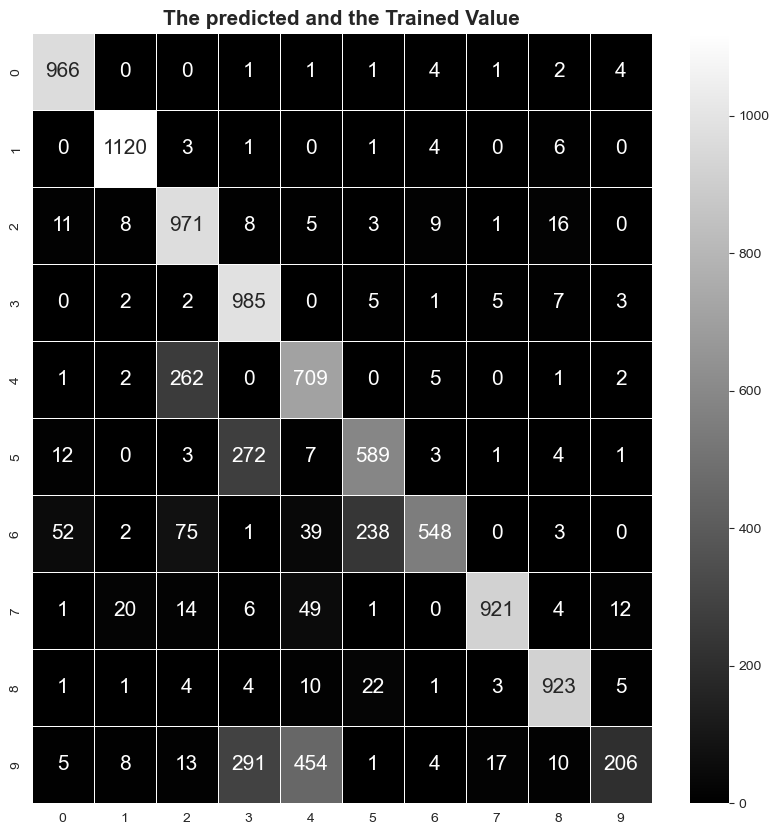

In [30]:
plt.figure(figsize=(10,10))
sns.heatmap(con_matrix, annot = True, annot_kws = {'size':15},linewidths = 0.5, fmt="d", cmap = 'grey')
plt.title("The predicted and the Trained Value",fontweight = 'bold',fontsize=15)

In [31]:
print(classification_report(y_test_digit_eval,y_predict)) # classification report

# overall accuracy is aroung 91

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       980
           1       0.96      0.99      0.97      1135
           2       0.72      0.94      0.82      1032
           3       0.63      0.98      0.76      1010
           4       0.56      0.72      0.63       982
           5       0.68      0.66      0.67       892
           6       0.95      0.57      0.71       958
           7       0.97      0.90      0.93      1028
           8       0.95      0.95      0.95       974
           9       0.88      0.20      0.33      1009

    accuracy                           0.79     10000
   macro avg       0.82      0.79      0.77     10000
weighted avg       0.82      0.79      0.78     10000



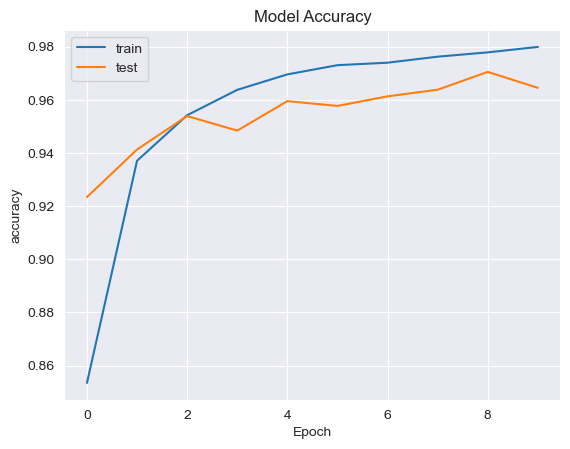

In [32]:
# accuracy Graph

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc = 'best')
plt.show()

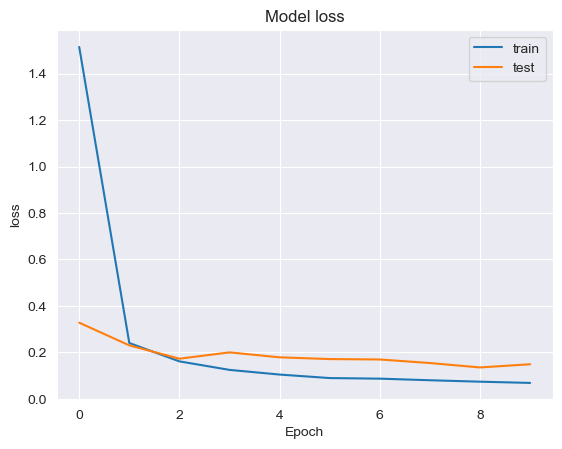

In [33]:
#Loss Graph

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc = 'best')
plt.show()

In [65]:
y_predict_single = model.predict(X_test_digit[[2]])
y_predict_singles = np.argmax(y_predict_single,axis=1)
y_test_digit_eval = np.argmax(y_test_digit,axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [73]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

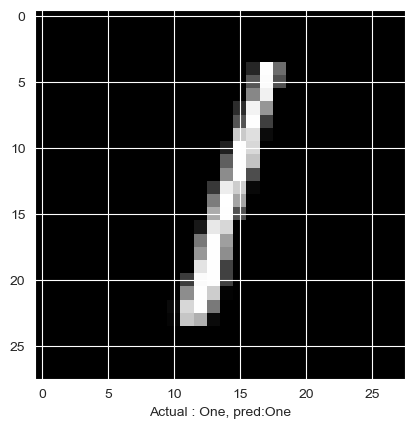

In [81]:
# Printing the predicted data and the test data

plt.imshow(X_test_digit[2].reshape(28,28), cmap = 'grey')
plt.xlabel("Actual : {}, pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predict_singles[0]]))
plt.show()